Title: Why Light & Wonder, Neuren, Nick Scali, and QBE shares are falling today
Description: These shares are having a tough session on Friday. But why?
The post Why Light & Wonder, Neuren, Nick Scali, and QBE shares are falling today appeared first on The Motley Fool Australia.
Sentiment: 0.22
--------------------------------------------------------------------------------
Title: Trade setup today: GIFT Nifty up 200 pts; global stocks rally; Ola listing
Description: All you need to know before the market opens on Friday: The US market rallied up to 3% last night after jobless claims dropped more than expected, soothing fears of a recession; FIIs continue to sell.
Sentiment: 0.13
--------------------------------------------------------------------------------
Title: SoundHound AI Reports 54% Growth and Record Q2 Revenue of $13.5 Million; Closes Quarter With Over $200 Million in Cash
Description: SoundHound AI Reports 54% Growth and Record Q2 Revenue of $13.5 Million; Closes Quarter Wit

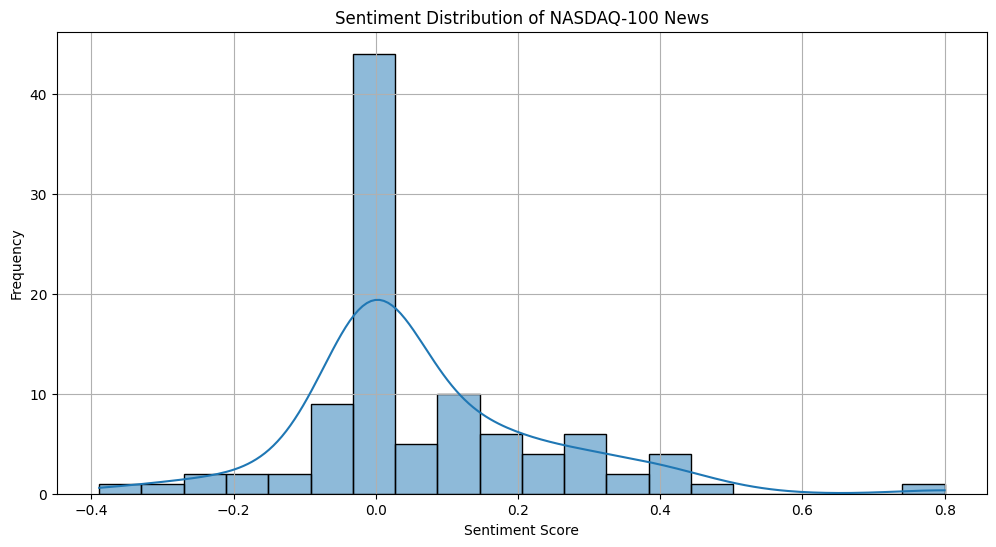

In [ ]:
import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
NEWS_API_KEY = '5e1bf00752d94ed3997cce90f8ef84bb'  # Replace with your NewsAPI key
NEWS_API_URL = 'https://newsapi.org/v2/everything'
QUERY = 'NASDAQ 100'
LANGUAGE = 'en'
SORT_BY = 'publishedAt'
PAGE_SIZE = 100  # Number of articles to fetch

def fetch_news(api_key, query, language, sort_by, page_size):
    params = {
        'q': query,
        'apiKey': api_key,
        'language': language,
        'sortBy': sort_by,
        'pageSize': page_size
    }
    response = requests.get(NEWS_API_URL, params=params)
    response.raise_for_status()  # Raise an error for bad responses
    return response.json()

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def plot_sentiment(sentiments):
    plt.figure(figsize=(12, 6))
    sns.histplot(sentiments, bins=20, kde=True)
    plt.title('Sentiment Distribution of NASDAQ-100 News')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main():
    # Fetch news articles
    news_data = fetch_news(NEWS_API_KEY, QUERY, LANGUAGE, SORT_BY, PAGE_SIZE)

    if news_data['status'] != 'ok':
        print("Error fetching news data")
        return

    articles = news_data['articles']

    if not articles:
        print("No news articles found")
        return

    sentiments = []

    # Analyze sentiment of each article
    for article in articles:
        title = article.get('title', '')
        description = article.get('description', '')

        if description:  # Ensure there's text to analyze
            sentiment = analyze_sentiment(description)
            sentiments.append(sentiment)
            print(f"Title: {title}")
            print(f"Description: {description}")
            print(f"Sentiment: {sentiment:.2f}")
            print("-" * 80)

    if sentiments:
        avg_sentiment = sum(sentiments) / len(sentiments)
        print(f"Average Sentiment Score: {avg_sentiment:.2f}")
        plot_sentiment(sentiments)

if __name__ == '__main__':
    main()
